<a href="https://colab.research.google.com/github/CharryDavid/Computer-Vision-Class-/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

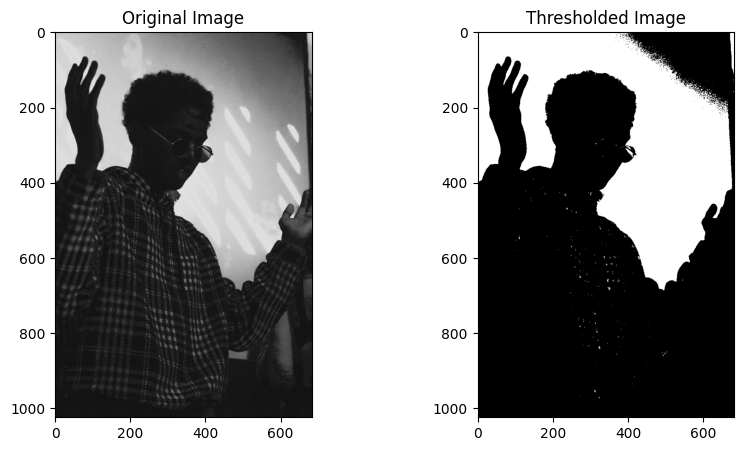

In [2]:
import skimage as sk
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu

# Load the image
image = sk.io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg', as_gray=True)

# Apply Otsu's thresholding
threshold = threshold_otsu(image)
binary_image = image > threshold

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(binary_image, cmap=plt.cm.gray)
axes[1].set_title('Thresholded Image')
plt.show()

# Analysis of results
# Otsu's thresholding finds the threshold that maximizes inter-class variance.
# In this case, it separates pixels into two groups: object and background.
# The effectiveness depends on the image contrast.

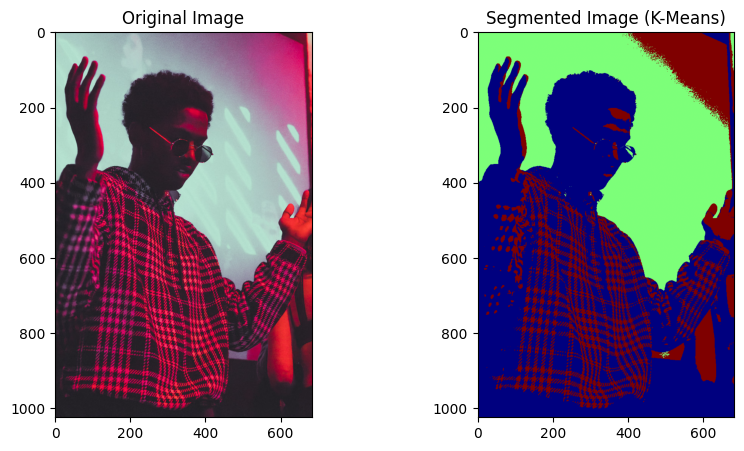

In [3]:
import numpy as np
from sklearn.cluster import KMeans

# Load the image
image = sk.io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg')

# Convert the image to a 2D array
image_2D = image.reshape((-1, 3))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2D)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (K-Means)')
plt.show()

# Evaluation of results
# K-Means groups pixels into clusters based on their color similarity.
# The quality of segmentation depends on the choice of the number of clusters.
# Metrics like silhouette score can be used to evaluate the quality.

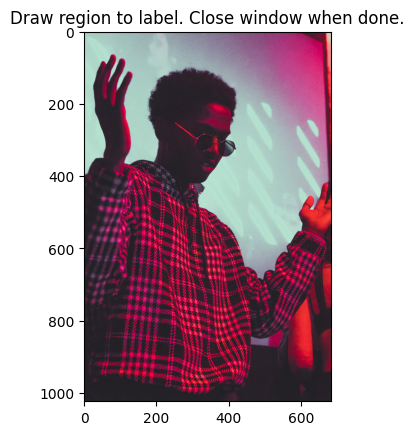

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:328: UserWarning: /content/my_manual_mask.png is a low contrast image
  return func(*args, **kwargs)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path

# Load image
image = io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg')
height, width, _ = image.shape
mask = np.zeros((height, width), dtype=np.uint8)

class SelectFromImage:
    def __init__(self, ax, label):
        self.canvas = ax.figure.canvas
        self.label = label
        self.mask = mask
        self.lasso = LassoSelector(ax, onselect=self.on_select)

    def on_select(self, verts):
        path = Path(verts)
        y, x = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
        points = np.vstack((y.flatten(), x.flatten())).T
        inside = path.contains_points(points)
        inside = inside.reshape((height, width))
        self.mask[inside] = self.label
        plt.imshow(self.mask, cmap='gray')
        plt.title(f'Label: {self.label}')
        plt.draw()

fig, ax = plt.subplots()
ax.imshow(image)
plt.title("Draw region to label. Close window when done.")

# Label the first region as '1', second as '2', etc.
selector = SelectFromImage(ax, label=1)
plt.show()

# Save mask if needed
io.imsave('/content/my_manual_mask.png', mask)


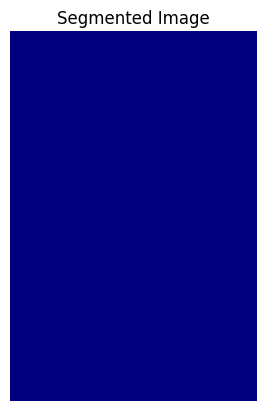

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skimage import io
import numpy as np

# Load your image and the label mask you just made
image = io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg')
labels = io.imread('/content/my_manual_mask.png', as_gray=True)

# Convert to 2D arrays
image_2D = image.reshape((-1, 3))
labels_1D = labels.reshape(-1).astype(np.uint8)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    image_2D, labels_1D, test_size=0.2, random_state=0
)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=0).fit(X_train, y_train)

# Predict labels for the full image
predicted_labels = classifier.predict(image_2D).reshape(image.shape[:2])

# Display segmented result
import matplotlib.pyplot as plt
plt.imshow(predicted_labels, cmap='jet')
plt.title("Segmented Image")
plt.axis('off')
plt.show()
